In [1]:
#import library and reading the data
import pandas as pd
df= pd.read_csv('cookie_cats_data.csv')

In [2]:
# Showing the first 10 rows
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
# Counting the number of players in each AB group
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [5]:
#import matplotlib
import matplotlib as plt
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds').count()['userid']

Text(0, 0.5, 'Users')

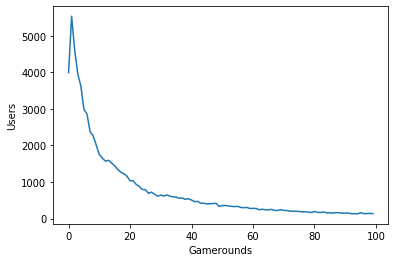

In [6]:
# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds', y='userid')
ax.set_xlabel("Gamerounds")
ax.set_ylabel("Users")

In [7]:
# The % of users that came back the day after they installed
df['retention_1'].mean()

0.4452095044850259

In [8]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [9]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

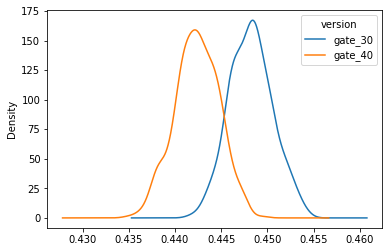

In [10]:
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde()

In [11]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100

Text(0.5, 0, '% difference in means')

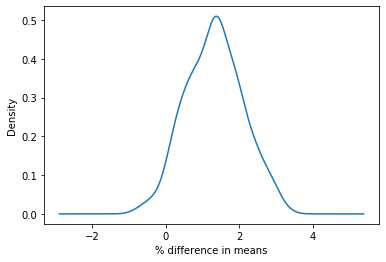

In [12]:
# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

In [15]:
# Calculate and print the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
print('{:.1%}'.format(prob))

96.6%


In [16]:
# Calculating 7-day retention for both AB-groups
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [17]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

Text(0.5, 0, '% difference in means')

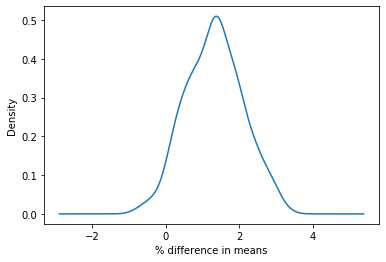

In [18]:
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_1d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

In [19]:
# Calculate and print the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print('{:.1%}'.format(prob))

96.6%


In [20]:
#The bootstrap result tells us that there is strong evidence that 7-day retention is
#higher when the gate is at level 30 than when it is at level 40. In order to keep retension high
#we should not move the gate from level 30 to level 40